## 3a) Simular la secuencia $W_k$ para distintos valores de $\alpha$ y $\theta$. Describa lo observado y fundamente con gráficos apropiados.

$W_k = S_k \prod_{i=1}^{k-1}(1-S_i)$, donde $\{S_k\}_{k=1}^{\infty}$ es una secuencia de variables aleatorias independientes tal que $S_k$ proviene de una distribución $\operatorname{Beta}(1-\alpha,\theta+\alpha k)$.

Importamos las librerías/funciones necesarias.

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

Definimos las funciones que nos generan las secuencias $S_k$ y $W_k$ de forma parametrizada en $\alpha$ y $\theta$.

In [120]:
def simular_seq_S_k(k, alpha, theta):
    return np.array([beta(1-alpha, theta+alpha*i).rvs(1) for i in range(1, k+1)])

def simular_seq_W_k(k, alpha, theta):
    Ss_k = simular_seq_S_k(k, alpha, theta)    
    return np.array([Ss_k[i-1] * np.prod(1-Ss_k[:(i-1)]) for i in range(1, k+1)])

Comprobamos mediante simulaciones que $W_k>0$ para todo número entero $k$ y que $\sum_{k=1}^{\infty}W_k = 1$. Dado que no podemos calcular la serie, veremos que las sumas parciales se aproximan a 1.

In [121]:
alpha = 0.5
theta = 2
n_ks = 1_000

In [122]:
sum_W_k = []
for i in range(1, n_ks, 30):
    if not np.all( simular_seq_W_k(i, alpha, theta) > 0 ):
        print(r'Existe $\W_k\leq0$')
    sum_W_k.append(simular_seq_W_k(i, alpha, theta).sum())

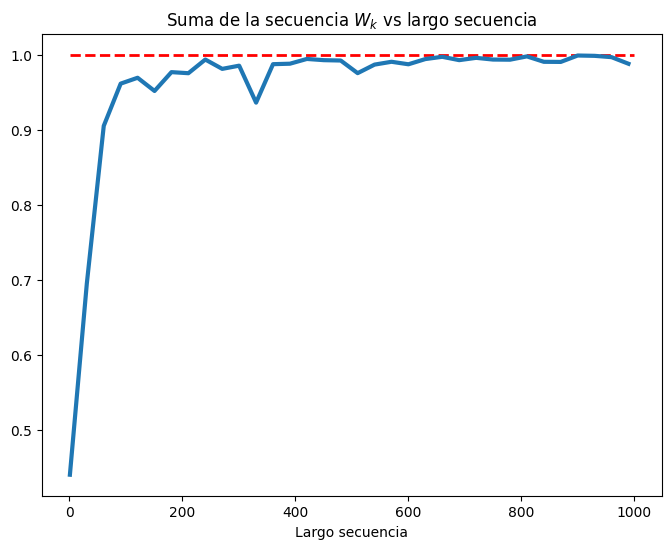

In [123]:
plt.figure(figsize=(8,6))
plt.plot([1,n_ks],[1,1], lw=2, c='r', ls='--')
plt.plot(range(1,n_ks,30), sum_W_k, lw=3)
plt.title(r'Suma de la secuencia $W_k$ vs largo secuencia')
plt.xlabel('Largo secuencia');

Simulemos para distintos valores de los parámetros.

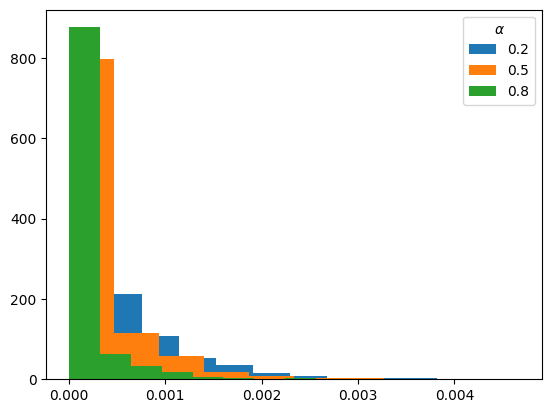

In [124]:
k = 1000
alphas = [0.2, 0.5, 0.8]
thetas = [1, 10, 100]

alpha_ = 0.5
theta_ = 1000

for alpha in alphas:
    plt.hist(simular_seq_W_k(k, alpha, theta_), label=f'{alpha}')
plt.legend(title=r'$\alpha$');

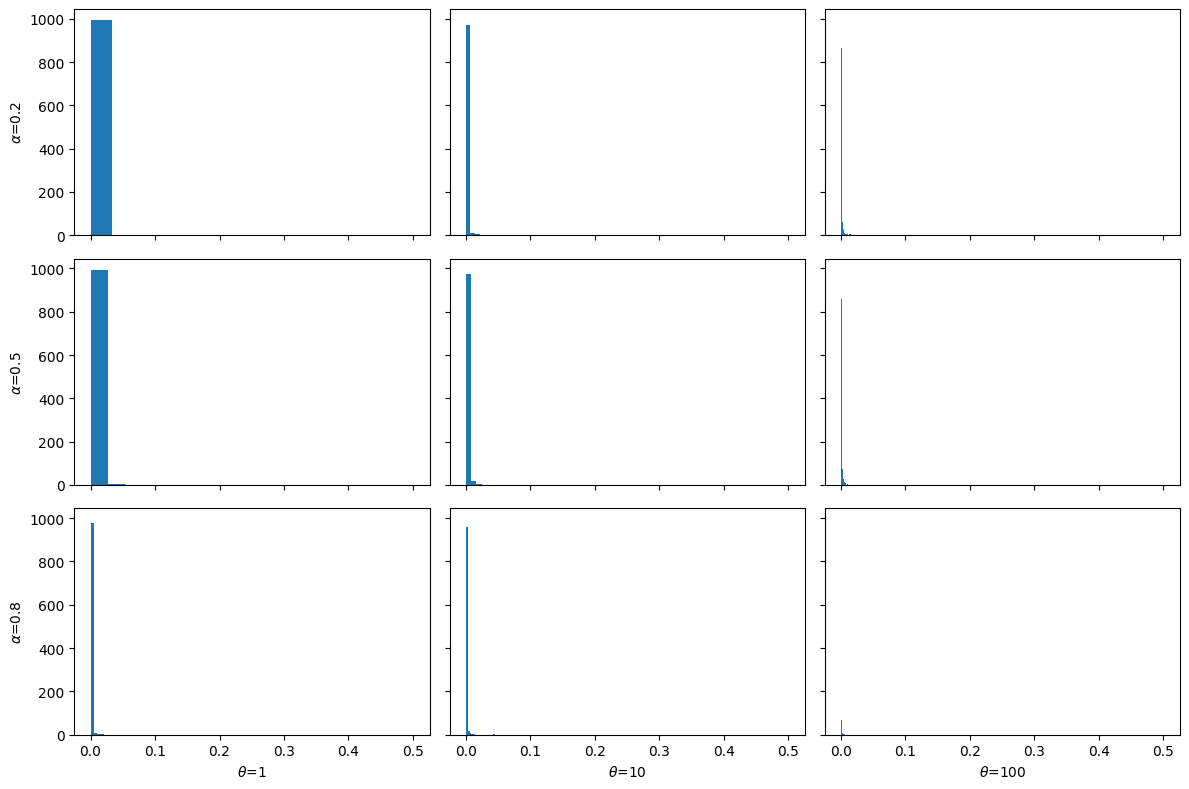

In [125]:
num_rows = len(alphas)
num_cols = len(thetas)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8), sharey=True, sharex=True)

for i, alpha in enumerate(alphas):
    for j, theta in enumerate(thetas):
        data = simular_seq_W_k(k, alpha, theta)
        axes[i, j].hist(data, bins=15)
        
        if i == num_rows-1:
            axes[i, j].set_xlabel(f'$\\theta$={theta}')
        if j == 0:
            axes[i, j].set_ylabel(f'$\\alpha$={alpha}')

fig.tight_layout()
plt.show()

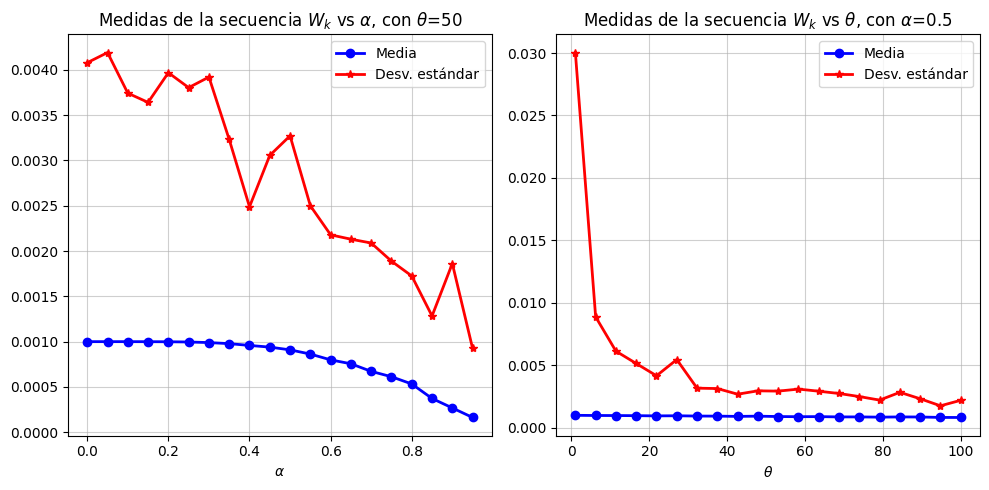

In [128]:
k = 1000
thetas = np.linspace(1,100,20)
alphas = np.arange(0,1,0.05)
alpha_ = 0.5
theta_ = 50

simulaciones = np.hstack([simular_seq_W_k(k, alpha, theta_) for alpha in alphas])
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(alphas, simulaciones.mean(axis=0),
         marker='o', lw=2, c='b', label='Media'
         )
plt.plot(alphas, simulaciones.std(axis=0),
         marker='*', lw=2, c='r', label='Desv. estándar'
         )
plt.title(f'Medidas de la secuencia $W_k$ vs $\\alpha$, con $\\theta$={theta_}')
plt.xlabel(r'$\alpha$')
plt.grid(alpha=0.6)
plt.legend()

simulaciones = np.hstack([simular_seq_W_k(k, alpha_, theta) for theta in thetas])
plt.subplot(1,2,2)
plt.plot(thetas, simulaciones.mean(axis=0),
         marker='o', lw=2, c='b', label='Media'
         )
plt.plot(thetas, simulaciones.std(axis=0),
         marker='*', lw=2, c='r', label='Desv. estándar'
         )
plt.title(f'Medidas de la secuencia $W_k$ vs $\\theta$, con $\\alpha$={alpha_}')
plt.xlabel(r'$\theta$')
plt.grid(alpha=0.6)
plt.legend()
plt.tight_layout()

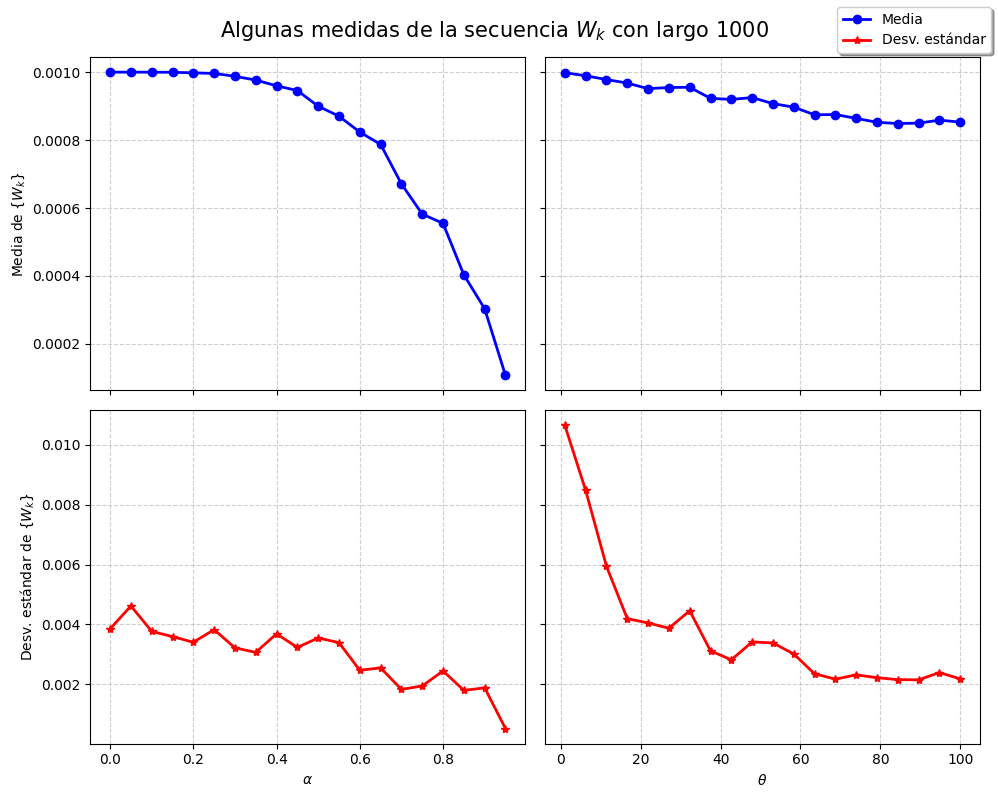

In [129]:
k = 1000
thetas = np.linspace(1,100,20)
alphas = np.arange(0,1,0.05)
alpha_ = 0.5
theta_ = 50

simulaciones = np.hstack([simular_seq_W_k(k, alpha, theta_) for alpha in alphas])

fig, axs = plt.subplots(2,2,figsize=(10,8), sharey='row', sharex='col')
axs = axs.flatten()
axs[0].plot(alphas, simulaciones.mean(axis=0),
            marker='o', lw=2, c='b', label='Media'
            )
axs[0].set_ylabel(r'Media de $\{W_k\}$')
axs[2].plot(alphas, simulaciones.std(axis=0),
            marker='*', lw=2, c='r'
            )
axs[2].set_ylabel(r'Desv. estándar de $\{W_k\}$')
axs[2].set_xlabel(r'$\alpha$')

simulaciones = np.hstack([simular_seq_W_k(k, alpha_, theta) for theta in thetas])

axs[1].plot(thetas, simulaciones.mean(axis=0),
            marker='o', lw=2, c='b'
            )
axs[3].plot(thetas, simulaciones.std(axis=0),
            marker='*', lw=2, c='r', label='Desv. estándar'
            )
axs[3].set_xlabel(r'$\theta$')

for i in range(4):
    axs[i].grid(alpha=0.6, ls='--') 
    
fig.suptitle(f'Algunas medidas de la secuencia $W_k$ con largo {k}', size=15)
fig.legend(shadow=True)
fig.tight_layout()